In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/moneyball-mlb-stats-19622012/baseball.csv


In [2]:
base = pd.read_csv("/kaggle/input/moneyball-mlb-stats-19622012/baseball.csv")
base.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [3]:
base.count()

Team            1232
League          1232
Year            1232
RS              1232
RA              1232
W               1232
OBP             1232
SLG             1232
BA              1232
Playoffs        1232
RankSeason       244
RankPlayoffs     244
G               1232
OOBP             420
OSLG             420
dtype: int64

DePodesta predicted 2002 season strategy using 1962-2001 data.

In [4]:
dpyears = base[base.Year < 2002]  
dpyears.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393


In [5]:
dpyears.count() #number of observations decreased because of year range

Team            902
League          902
Year            902
RS              902
RA              902
W               902
OBP             902
SLG             902
BA              902
Playoffs        902
RankSeason      154
RankPlayoffs    154
G               902
OOBP             90
OSLG             90
dtype: int64

Number of Teams in MLB!

In [6]:
# check = base[base.Year == 2002]
# teamcount = check['Team'].count()
# teamcount = base[base.Year == 2001][base.Playoffs == 1]['Team'].count()
teamcount = base[base.Year == 2001]['Team'].count()
teamcount

30

In [7]:
teams = base.Team.value_counts()
teams

CHW    47
SFG    47
HOU    47
DET    47
CHC    47
NYY    47
STL    47
LAD    47
MIN    47
CLE    47
NYM    47
BOS    47
PHI    47
BAL    47
CIN    47
PIT    47
ATL    43
OAK    41
SDP    40
KCR    40
MIL    39
TEX    37
TOR    33
SEA    33
MON    32
CAL    28
COL    18
FLA    17
ARI    15
LAA    11
WSA    10
TBD    10
WSN     8
ANA     8
KCA     6
TBR     5
MLN     4
SEP     1
MIA     1
Name: Team, dtype: int64

DePodesta predicted that if can win 95 in a season you are almost certainly qualified for the Playoffs!!  

In [8]:
qualifiedwins = base[base.Year < 2002]
# qualifiedwins
qualifiedwinsnew = qualifiedwins[['Team','Year','W','Playoffs']]
# qualifiedwinsnew = qualifiedwinsnew[qualifiedwinsnew.Playoffs == 1]
qualifiedwinsnew

,Team,Year,W,Playoffs
330,ANA,2001,75,0
331,ARI,2001,92,1
332,ATL,2001,88,1
333,BAL,2001,63,0
334,BOS,2001,82,0
...,...,...,...,...
1227,PHI,1962,81,0
1228,PIT,1962,93,0
1229,SFG,1962,103,1
1230,STL,1962,84,0


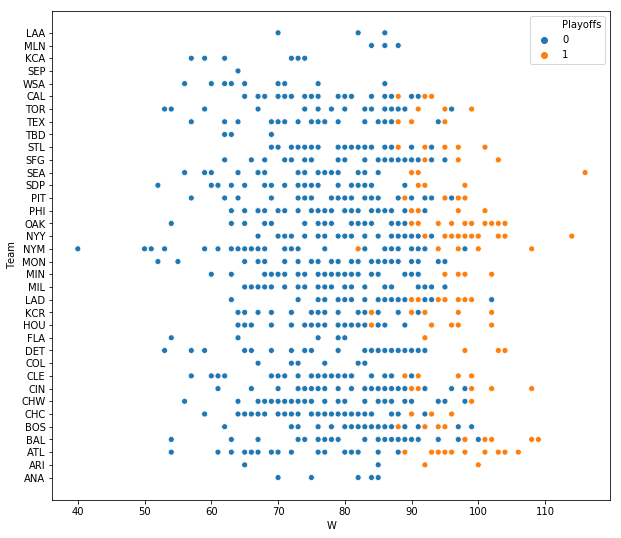

In [9]:
import seaborn as sns; 
import matplotlib.pyplot as plt
# tips = sns.load_dataset("qualifiedwinsnew")
plt.figure(figsize=(10,9))
ax = sns.scatterplot(x="W", y="Team", hue="Playoffs",data=qualifiedwinsnew)
plt.plot(95, 0, color='r')

Now we know you 95 wins in a season to make the playoffs!

But how much more do you score than give away?

DePodesta predicted 135 runs difference to make the playoffs with 95 wins. Let's see!

In [10]:
runs = base[base.Year < 2002]
runs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902 entries, 330 to 1231
Data columns (total 15 columns):
Team            902 non-null object
League          902 non-null object
Year            902 non-null int64
RS              902 non-null int64
RA              902 non-null int64
W               902 non-null int64
OBP             902 non-null float64
SLG             902 non-null float64
BA              902 non-null float64
Playoffs        902 non-null int64
RankSeason      154 non-null float64
RankPlayoffs    154 non-null float64
G               902 non-null int64
OOBP            90 non-null float64
OSLG            90 non-null float64
dtypes: float64(7), int64(6), object(2)
memory usage: 112.8+ KB


In [11]:
runs['RD'] = runs['RS'] - runs['RA']
runs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902 entries, 330 to 1231
Data columns (total 16 columns):
Team            902 non-null object
League          902 non-null object
Year            902 non-null int64
RS              902 non-null int64
RA              902 non-null int64
W               902 non-null int64
OBP             902 non-null float64
SLG             902 non-null float64
BA              902 non-null float64
Playoffs        902 non-null int64
RankSeason      154 non-null float64
RankPlayoffs    154 non-null float64
G               902 non-null int64
OOBP            90 non-null float64
OSLG            90 non-null float64
RD              902 non-null int64
dtypes: float64(7), int64(7), object(2)
memory usage: 119.8+ KB


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


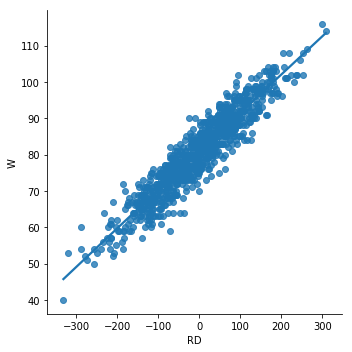

In [12]:
sns.lmplot(x ="RD", y ="W", data = runs, order = 2, ci = None)

Plot shows DePodesta might be right. But lets be certain.

In [13]:
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

X = np.array(runs['RD']).reshape(-1, 1) 
y = np.array(runs['W']).reshape(-1, 1) 
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
  
# Splitting the data into training and testing data 
regr = LinearRegression() 
  
m = regr.fit(X_train, y_train)
m.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [14]:
print(regr.score(X_test, y_test))

0.8852169042986944


In [15]:
regr.predict(np.array(133).reshape(-1, 1))

array([[94.98645028]])

In [16]:
import statsmodels.formula.api as smf
smf.ols(formula ='W ~ RD',data=runs).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     6651.
Date:                Wed, 20 May 2020   Prob (F-statistic):               0.00
Time:                        12:04:36   Log-Likelihood:                -2515.5
No. Observations:                 902   AIC:                             5035.
Df Residuals:                     900   BIC:                             5045.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.8814      0.131    616.675      0.000      80.624      81.139
RD             0.1058      0.001     81.554      0.000       0.103       0.108
==============================================================================
Omnibus:                        5.788   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                5.736
Skew:                          -0.195   Prob(JB):                       0.0568
Kurtosis:                       3.033   Cond. No.                         101.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We have linear regression relationship:

Wins = 80.8814 + 0.1058*RD

So if wins are 95 the run difference is calculated as 

RD = (95 - 80.8814)/0.1058 ~ 133

Close Enough!!!

Now how to get there? 

For this he used 2001 data. He found out that On Base Percentage and Slugging Rate are the most important attributes to predict the runs scored.  

In [17]:
# runscored = runs[runs.Year == 2001]
smf.ols(formula ='RS ~ OBP + SLG',data=runs).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     RS   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     5934.
Date:                Wed, 20 May 2020   Prob (F-statistic):               0.00
Time:                        12:04:36   Log-Likelihood:                -4174.2
No. Observations:                 902   AIC:                             8354.
Df Residuals:                     899   BIC:                             8369.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -804.6271     18.921    -42.526      0.000    -841.761    -767.493
OBP         2737.7680     90.685     30.190      0.000    2559.790    2915.746
SLG         1584.9086     42.156     37.597      0.000    1502.174    1667.643
==============================================================================
Omnibus:                        3.099   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.212   Jarque-Bera (JB):                3.106
Skew:                           0.143   Prob(JB):                        0.212
Kurtosis:                       2.972   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Equation is
RS = -804.6271 + 2737.7680(OBP) + 1584.9086(SLG)

So if put in 2001 values of Oakland Athletics we get 

In [18]:
obp = runs[runs.Year == 2001][runs.Team == 'OAK'][['Team','OBP','SLG']]
obp

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Team,OBP,SLG
350,OAK,0.345,0.439


If we put these values in we get that they will score close to 835 runs.  

Similarly, for Run Allowed. 

In [19]:
smf.ols(formula ='RA ~ OOBP + OSLG',data=runs).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     RA   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     425.8
Date:                Wed, 20 May 2020   Prob (F-statistic):           1.16e-45
Time:                        12:04:36   Log-Likelihood:                -418.27
No. Observations:                  90   AIC:                             842.5
Df Residuals:                      87   BIC:                             850.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -837.3779     60.255    -13.897      0.000    -957.142    -717.614
OOBP        2913.5995    291.971      9.979      0.000    2333.276    3493.923
OSLG        1514.2860    175.428      8.632      0.000    1165.604    1862.968
==============================================================================
Omnibus:                        3.836   Durbin-Watson:                   2.160
Prob(Omnibus):                  0.147   Jarque-Bera (JB):                3.104
Skew:                          -0.392   Prob(JB):                        0.212
Kurtosis:                       3.461   Cond. No.                         139.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

RA = -837.3779 + 2913.6(OOBP) + 1514.3(OSLG)


In [20]:
oobp = runs[runs.Year == 2001][runs.Team == 'OAK'][['Team','OOBP','OSLG']]
oobp

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Team,OOBP,OSLG
350,OAK,0.308,0.38


635 runs.

Now if we put these values of RS and RA we can predict wins in 2002.

Wins = 80.8814 + 0.1058 * RD

Wins = 102

Which is very close to the actual wins (103)!!!!